In [2]:
import pandas as pd
import numpy as np
import datetime as datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
years = range(2000,2015)

pieces = []
columns = ['When Reported','Offense Code','location']

for year in years:
    path = 'C:/Users/flunk_000/Desktop/CalPoly/StakeOut/%d.csv' % year
    frame = pd.read_csv(path, names=columns, header = True)

    pieces.append(frame)

crimeData = pd.concat(pieces, ignore_index=True)

#Total Crime/Day

In [4]:
for i in range(len(crimeData['location'])):
    if crimeData['location'][i] == 'LZ1':
        crimeData['location'][i]=1
    if crimeData['location'][i] =='LZ2':
        crimeData['location'][i]=2
    if crimeData['location'][i]=='LZ3':
        crimeData['location'][i]=3

In [5]:
crimeData['When Reported'] = [datetime.datetime.strptime(date, '%H:%M:%S %m/%d/%Y') for date in crimeData['When Reported']]

In [6]:
crimeData['When Reported'] = sorted(crimeData['When Reported'])

In [7]:
ts = pd.Series(crimeData['location'],index=crimeData['When Reported'])
ts[0:] = 1

In [8]:
byDay = ts.resample('D',how='sum')

In [9]:
mean=round(np.mean(byDay),2)
std=round(np.std(byDay),2)

## Total Crime: Visualization

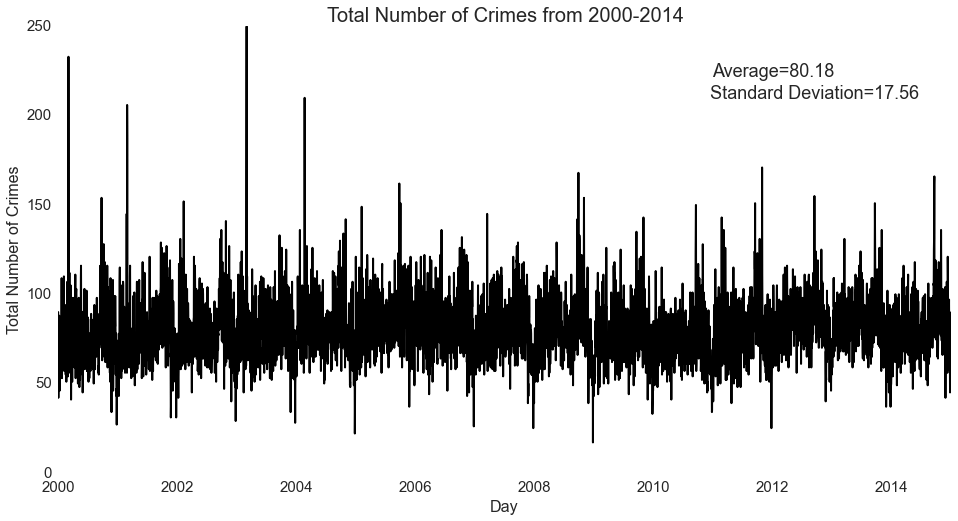

In [10]:
figure = plt.figure(figsize=(16,8))
TSPlot = byDay.plot(linewidth=2, c='black')

TSPlot.set_ylabel('Total Number of Crimes', fontsize=16)
TSPlot.set_xlabel('Day',fontsize=16)
TSPlot.set_title('Total Number of Crimes from 2000-2014',fontsize=20)
plt.tick_params(axis='both', labelsize=15)

#### ADD STATISTICS TEXT####
TSPlot.text(0.8, 0.9,'Average=%.2f' %mean, ha='center', va='center', transform=TSPlot.transAxes, fontsize = 18)
TSPlot.text(0.8465, 0.85,'Standard Deviation=%.2f' %std, ha='center', va='center', transform=TSPlot.transAxes, fontsize = 18);

##Total Crime: Harmonic Model 

In [39]:
print(len(byDay[0:2048]));
print(len(byDay[1383:3431]));
print(len(byDay[2048:4096]));
print(len(byDay[3431:5479]));

2048
2048
2048
2048


In [59]:
ffts = {'1stWindow':np.fft.fft(byDay[0:2048]),
        '2ndWindow':np.fft.fft(byDay[1383:3431]),
        '3rdWindow':np.fft.fft(byDay[2048:4096]),
        '4thWindow':np.fft.fft(byDay[3431:5479])}

In [63]:
harmonicDF = pd.DataFrame(ffts)

In [35]:
def imabs(complexNum):
    return 2*abs(complexNum)/float(2048)

In [65]:
harmonicDF['peakAmp1st']= harmonicDF.apply(lambda row: imabs(row['1stWindow']), axis=1)
harmonicDF['peakAmp2nd']= harmonicDF.apply(lambda row: imabs(row['2ndWindow']), axis=1)
harmonicDF['peakAmp3rd']= harmonicDF.apply(lambda row: imabs(row['3rdWindow']), axis=1)
harmonicDF['peakAmp4th']= harmonicDF.apply(lambda row: imabs(row['4thWindow']), axis=1)

In [68]:
harmonicDF['peakAmp1st'][0] = 0
harmonicDF['peakAmp1st'][1023] = abs(harmonicDF['1stWindow'][1023])

harmonicDF['peakAmp2nd'][0] = 0
harmonicDF['peakAmp2nd'][1023] = abs(harmonicDF['2ndWindow'][1023])

harmonicDF['peakAmp3rd'][0] = 0
harmonicDF['peakAmp3rd'][1023] = abs(harmonicDF['3rdWindow'][1023])

harmonicDF['peakAmp4th'][0] = 0
harmonicDF['peakAmp4th'][1023] = abs(harmonicDF['4thWindow'][1023])

In [70]:
harmonicDF['k'] = np.arange(len(harmonicDF))

In [71]:
harmonicDF['freq'] = harmonicDF['k']/(2048)

## ADD GRID SPEC FOR 4 FFTS

#Total Crime/Day, by Zone 

In [11]:
z1 = crimeData.query('location == 1')
z2 = crimeData.query('location == 2')
z3 = crimeData.query('location == 3')

In [12]:
print('Total crime for zone 1:',len(z1));print('Total crime for zone 2:',len(z2));print('Total crime for zone 3:',(len(z3)))

('Total crime for zone 1:', 167318)
('Total crime for zone 2:', 176247)
('Total crime for zone 3:', 75107)


In [13]:
z1 = z1.reset_index();
z2 = z2.reset_index();
z3 = z3.reset_index();

In [14]:
del z1['index']
del z2['index']
del z3['index']

In [15]:
z1TS = pd.Series(z1['location'],index=z1['When Reported'])
z1TS[0:] = 1

z2TS = pd.Series(z1['location'],index=z2['When Reported'])
z2TS[0:] = 1

z3TS = pd.Series(z1['location'],index=z3['When Reported'])
z3TS[0:] = 1

In [16]:
z1TS = z1TS.resample('D',how='sum')
z2TS = z2TS.resample('D',how='sum')
z3TS = z3TS.resample('D',how='sum')

In [17]:
z1mean = round(np.mean(z1TS),2)
z1std = round(np.std(z1TS),2)

z2mean = round(np.mean(z2TS),2)
z2std = round(np.std(z2TS),2)

z3mean = round(np.mean(z3TS),2)
z3std = round(np.std(z3TS),2)

## Crime by Zone: Visualization

In [18]:
from matplotlib.gridspec import GridSpec

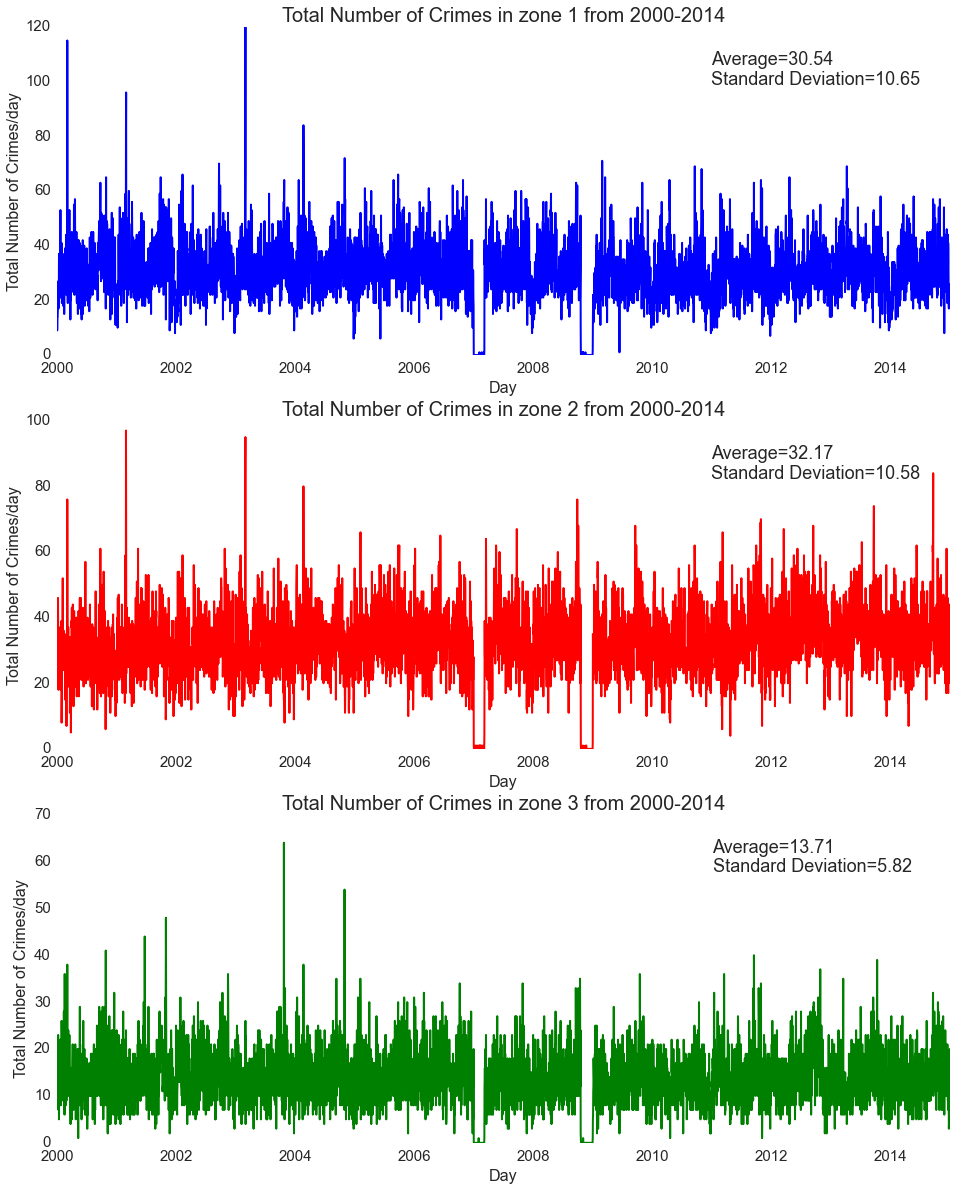

In [32]:
figure = plt.figure(figsize=(16,20))
gs = GridSpec(3,1)

z1plot = figure.add_subplot(gs[0,0])
z1plot =z1TS.plot(linewidth=2, c='blue')
z1plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z1plot.set_xlabel('Day',fontsize=16)
z1plot.set_title('Total Number of Crimes in zone 1 from 2000-2014',fontsize=20)
z1plot.tick_params(axis='both', labelsize=15)
z1plot.text(0.8, 0.9,'Average=%.2f' %z1mean, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18)
z1plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z1std, ha='center', va='center', transform=z1plot.transAxes, fontsize = 18);

z2plot = figure.add_subplot(gs[1,0])
z2plot = z2TS.plot(linewidth=2, c='red')
z2plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z2plot.set_xlabel('Day',fontsize=16)
z2plot.set_title('Total Number of Crimes in zone 2 from 2000-2014',fontsize=20)
z2plot.tick_params(axis='both', labelsize=15)
z2plot.text(0.8, 0.9,'Average=%.2f' %z2mean, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18)
z2plot.text(0.849, 0.84,'Standard Deviation=%.2f' %z2std, ha='center', va='center', transform=z2plot.transAxes, fontsize = 18);

z3plot = figure.add_subplot(gs[2,0])
z3plot = z3TS.plot(linewidth=2, c='green')
z3plot.set_ylabel('Total Number of Crimes/day', fontsize=16)
z3plot.set_xlabel('Day',fontsize=16)
z3plot.set_title('Total Number of Crimes in zone 3 from 2000-2014',fontsize=20)
z3plot.tick_params(axis='both', labelsize=15)
z3plot.text(0.8, 0.9,'Average=%.2f' %z3mean, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18)
z3plot.text(0.846, 0.84,'Standard Deviation=%.2f' %z3std, ha='center', va='center', transform=z3plot.transAxes, fontsize = 18);

##Crime by Zone: Harmonic Model 